In [12]:
from sympy import lambdify
from sympy import symbols, integrate, solve
from scipy.optimize import minimize_scalar
import numpy as np
import matplotlib.pyplot as plt

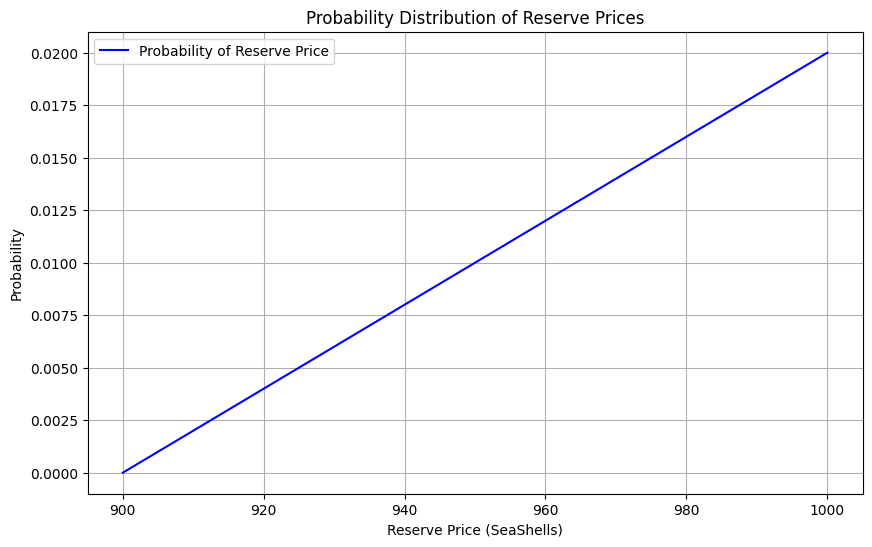

In [13]:
# Define the range of prices from 900 to 1000
prices = np.linspace(900, 1000, 101)
# Calculate the probability for each price using the linear probability distribution
# Since k = 1/5000 and probability scales linearly from least likely at 900 to most likely at 1000
probabilityBidEqualsAsk = (prices - 900) * (1/5000)

# Plotting the prices vs their probability
plt.figure(figsize=(10, 6))
plt.plot(prices, probabilityBidEqualsAsk, label='Probability of Reserve Price', color='blue')
plt.xlabel('Reserve Price (SeaShells)')
plt.ylabel('Probability')
plt.title('Probability Distribution of Reserve Prices')
plt.legend()
plt.grid(True)
plt.show()


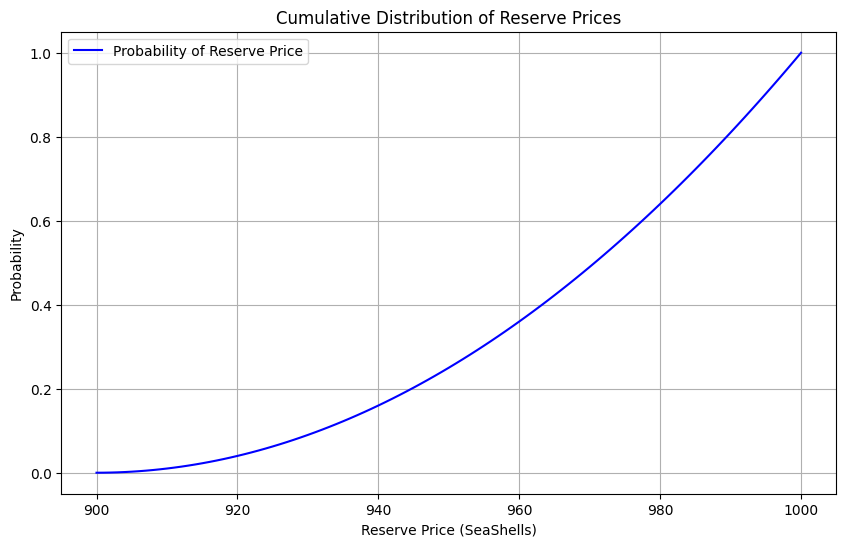

In [14]:

# Calculate the probability for each price using the linear probability distribution
# Since k = 1/5000 and probability scales linearly from least likely at 900 to most likely at 1000
probabilityBidGreaterThanAsk = ((prices ** 2)/10000) - ((9 * prices)/50) + 81

# Plotting the prices vs their probability
plt.figure(figsize=(10, 6))
plt.plot(prices, probabilityBidGreaterThanAsk, label='Probability of Reserve Price', color='blue')
plt.xlabel('Reserve Price (SeaShells)')
plt.ylabel('Probability')
plt.title('Cumulative Distribution of Reserve Prices')
plt.legend()
plt.grid(True)
plt.show()

0.5511000000000053


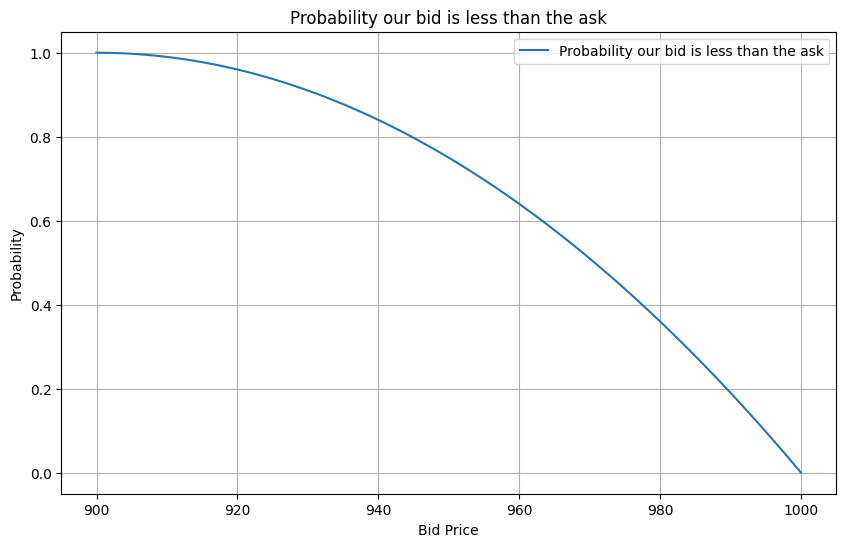

In [15]:
probabilityBidIsLessThanAsk = 1 - probabilityBidGreaterThanAsk
print(probabilityBidIsLessThanAsk[67])
# Plotting the payoff function
plt.figure(figsize=(10, 6))
plt.plot(prices, probabilityBidIsLessThanAsk, label='Probability our bid is less than the ask')
plt.xlabel('Bid Price')
plt.ylabel('Probability')
plt.title('Probability our bid is less than the ask')
plt.legend()
plt.grid(True)
plt.show()

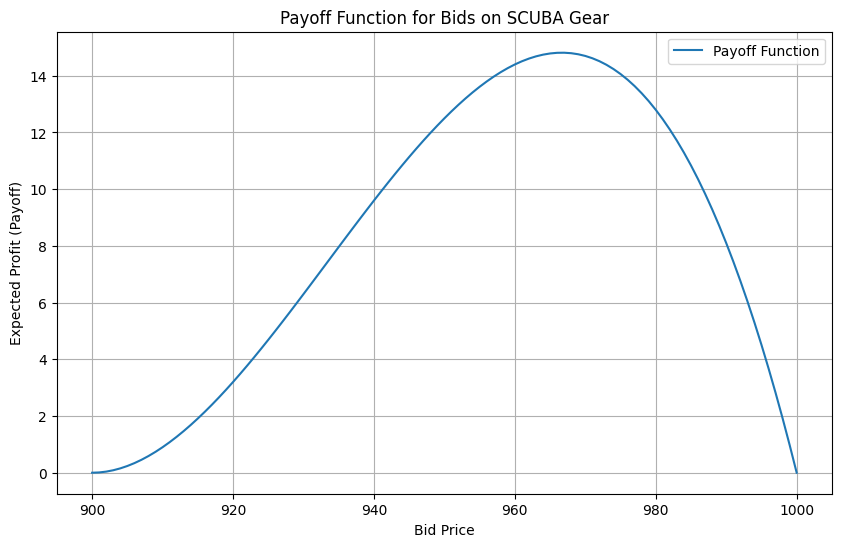

In [16]:


# Calculate the payoff for each bid in the range
payoff = (1000 - prices) * probabilityBidGreaterThanAsk

# Plotting the payoff function
plt.figure(figsize=(10, 6))
plt.plot(prices, payoff, label='Payoff Function')
plt.xlabel('Bid Price')
plt.ylabel('Expected Profit (Payoff)')
plt.title('Payoff Function for Bids on SCUBA Gear')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
pricesOfPayoff = dict(zip(prices, payoff)) 
maxPriceBid = max(pricesOfPayoff, key=pricesOfPayoff.get)
maxPayoff = max(payoff)

firstBid = 952
firstBidIndex = int(firstBid - 900)

print(f"Payoff at {maxPriceBid-1} {payoff[firstBidIndex-1]}, Payoff at {maxPriceBid}: {payoff[firstBidIndex]}")
print(f"Max Price: {firstBid}, Max Payoff: {payoff[firstBidIndex]}")

Payoff at 966.0 12.744899999999717, Payoff at 967.0: 12.979199999999082
Max Price: 952, Max Payoff: 12.979199999999082


Lowest bid should be 967.

0.014254385964911909 0.02741228070175367
49


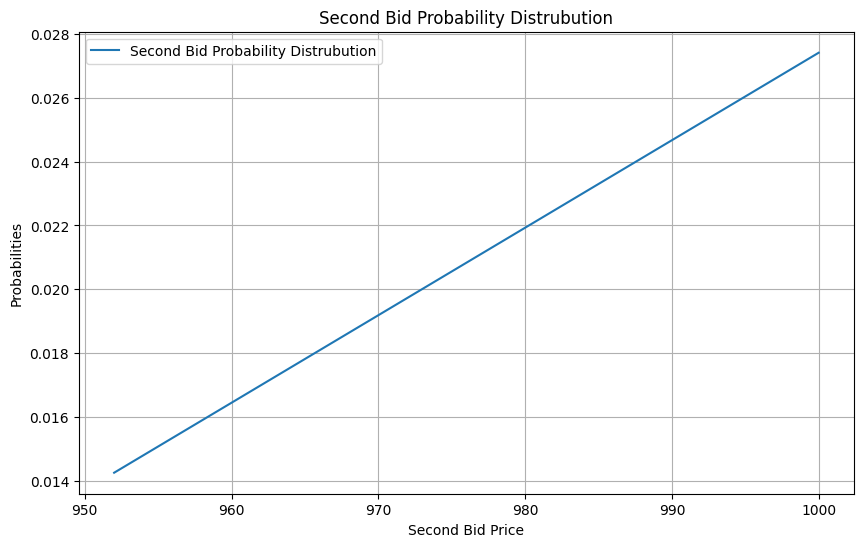

In [18]:
probabilitySecondBidEqualsAsk = probabilityBidEqualsAsk[firstBidIndex:] / probabilityBidIsLessThanAsk[firstBidIndex]
print(probabilitySecondBidEqualsAsk[0], probabilitySecondBidEqualsAsk[-1])
print(len(probabilitySecondBidEqualsAsk))

# Plotting the payoff function
plt.figure(figsize=(10, 6))
plt.plot(prices[firstBidIndex:], probabilitySecondBidEqualsAsk, label='Second Bid Probability Distrubution')
plt.xlabel('Second Bid Price')
plt.ylabel('Probabilities')
plt.title('Second Bid Probability Distrubution')
plt.legend()
plt.grid(True)
plt.show()

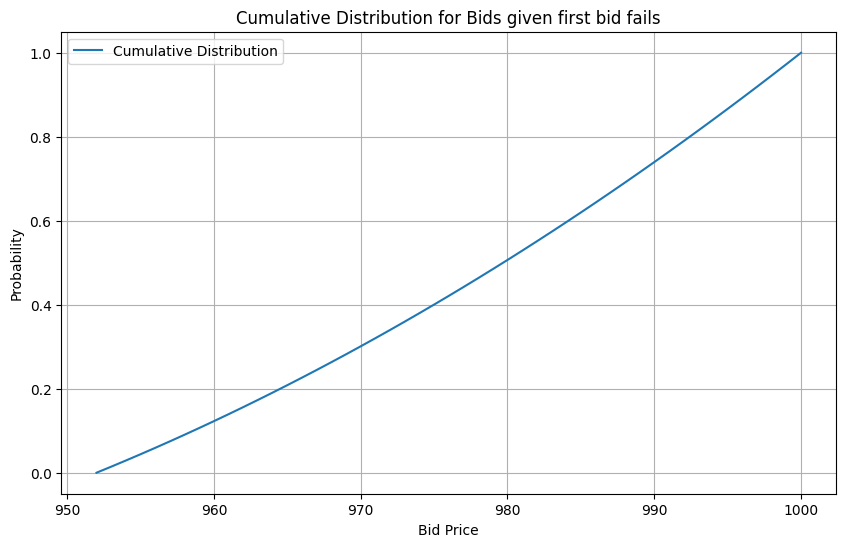

In [19]:
# Define the prices
newPrices = np.linspace(firstBid, 1000, 1000 - firstBid + 1)

newCumulativeProbability = ((newPrices ** 2)/(2*probabilityBidIsLessThanAsk[firstBidIndex]*5000)) - ((900 * newPrices)/(5000 * probabilityBidIsLessThanAsk[firstBidIndex]))
newCumulativeProbability -= newCumulativeProbability[0]
# Plotting the payoff function
plt.figure(figsize=(10, 6))
plt.plot(newPrices, newCumulativeProbability, label='Cumulative Distribution')
plt.xlabel('Bid Price')
plt.ylabel('Probability')
plt.title('Cumulative Distribution for Bids given first bid fails')
plt.legend()
plt.grid(True)
plt.show()

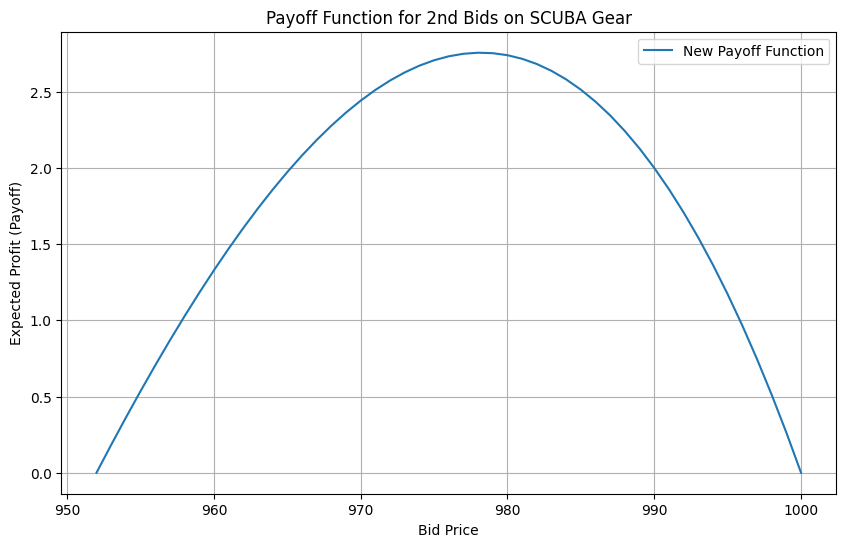

In [20]:
# Calculate the payoff for each bid in the range
newPayoff = ((1000 - newPrices) * newCumulativeProbability) * (probabilityBidGreaterThanAsk[firstBidIndex])

# Plotting the payoff function
plt.figure(figsize=(10, 6))
plt.plot(newPrices, newPayoff, label='New Payoff Function')
plt.xlabel('Bid Price')
plt.ylabel('Expected Profit (Payoff)')
plt.title('Payoff Function for 2nd Bids on SCUBA Gear')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
pricesOfNewPayoff = dict(zip(newPrices, newPayoff)) 
maxSecondPayoff = max(newPayoff)
maxSecondPayoffBid = max(pricesOfNewPayoff, key=pricesOfNewPayoff.get)

secondBid = int(maxSecondPayoffBid)
secondBidIndex = int(secondBid - 900 - firstBidIndex)

print(f"Payoff at {secondBid-1} {newPayoff[secondBidIndex-1]}, Payoff at {secondBid} {newPayoff[secondBidIndex]}, Payoff at {secondBid+1} {newPayoff[secondBidIndex+1]}")
print(f"Max Price: {maxSecondPayoffBid}, Max Payoff: {maxSecondPayoff}")

Payoff at 977 2.7490296052627308, Payoff at 978 2.7558859649118843, Payoff at 979 2.7528098684206626
Max Price: 978.0, Max Payoff: 2.7558859649118843


WRONG:
First bid: 956, second bid: 980, firstBidPayoff: 13.79839999999973, secondBidPayoff: 9.510489510489606, totalPayoff: 23.308889510489337



In [22]:
totalPayoff = (payoff[firstBidIndex] + newPayoff[secondBidIndex])
print(totalPayoff)

15.735085964910967
